### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
# Load the Diabetes dataset from sklearn
diabetes = datasets.load_diabetes()

In [3]:
# Create a DataFrame from the dataset
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

### EDA

In [4]:
# Display basic information about the dataset
print("Dataset Shape:", diabetes_df.shape)
print("\nColumns:", diabetes_df.columns)
print("\nInfo:")
print(diabetes_df.info())
print("\nNull Values:")
print(diabetes_df.isnull().sum())

Dataset Shape: (442, 11)

Columns: Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Null Values:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [5]:
# Display summary statistics of numerical columns
print("\nSummary Statistics:")
print(diabetes_df.describe())


Summary Statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -1.444295e-18  2.543215e-18 -2.255925e-16 -4.854086e-17 -1.428596e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.898811e-17 -6.028360e-18 -1.788100e-17  9.243486e-17  1.351770e-17   
std    4.761905e-02  4.761905e

### Plots

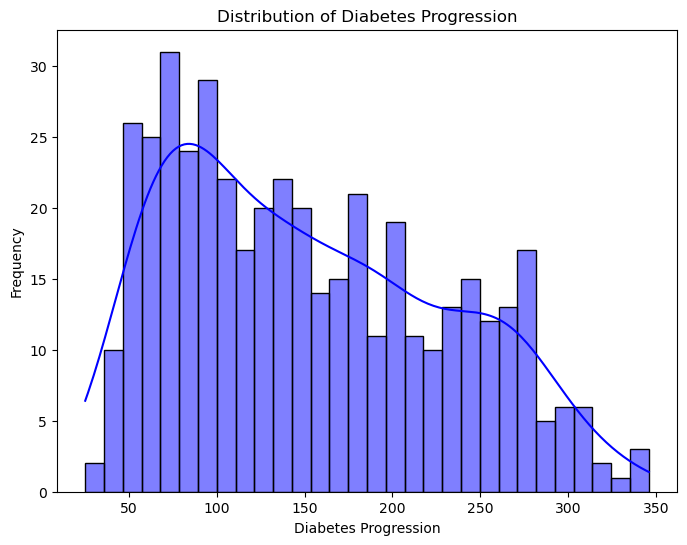

In [6]:
# Visualize the distribution of the target variable (diabetes progression)
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_df['target'], bins=30, kde=True, color='blue')
plt.title('Distribution of Diabetes Progression')
plt.xlabel('Diabetes Progression')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x1000 with 0 Axes>

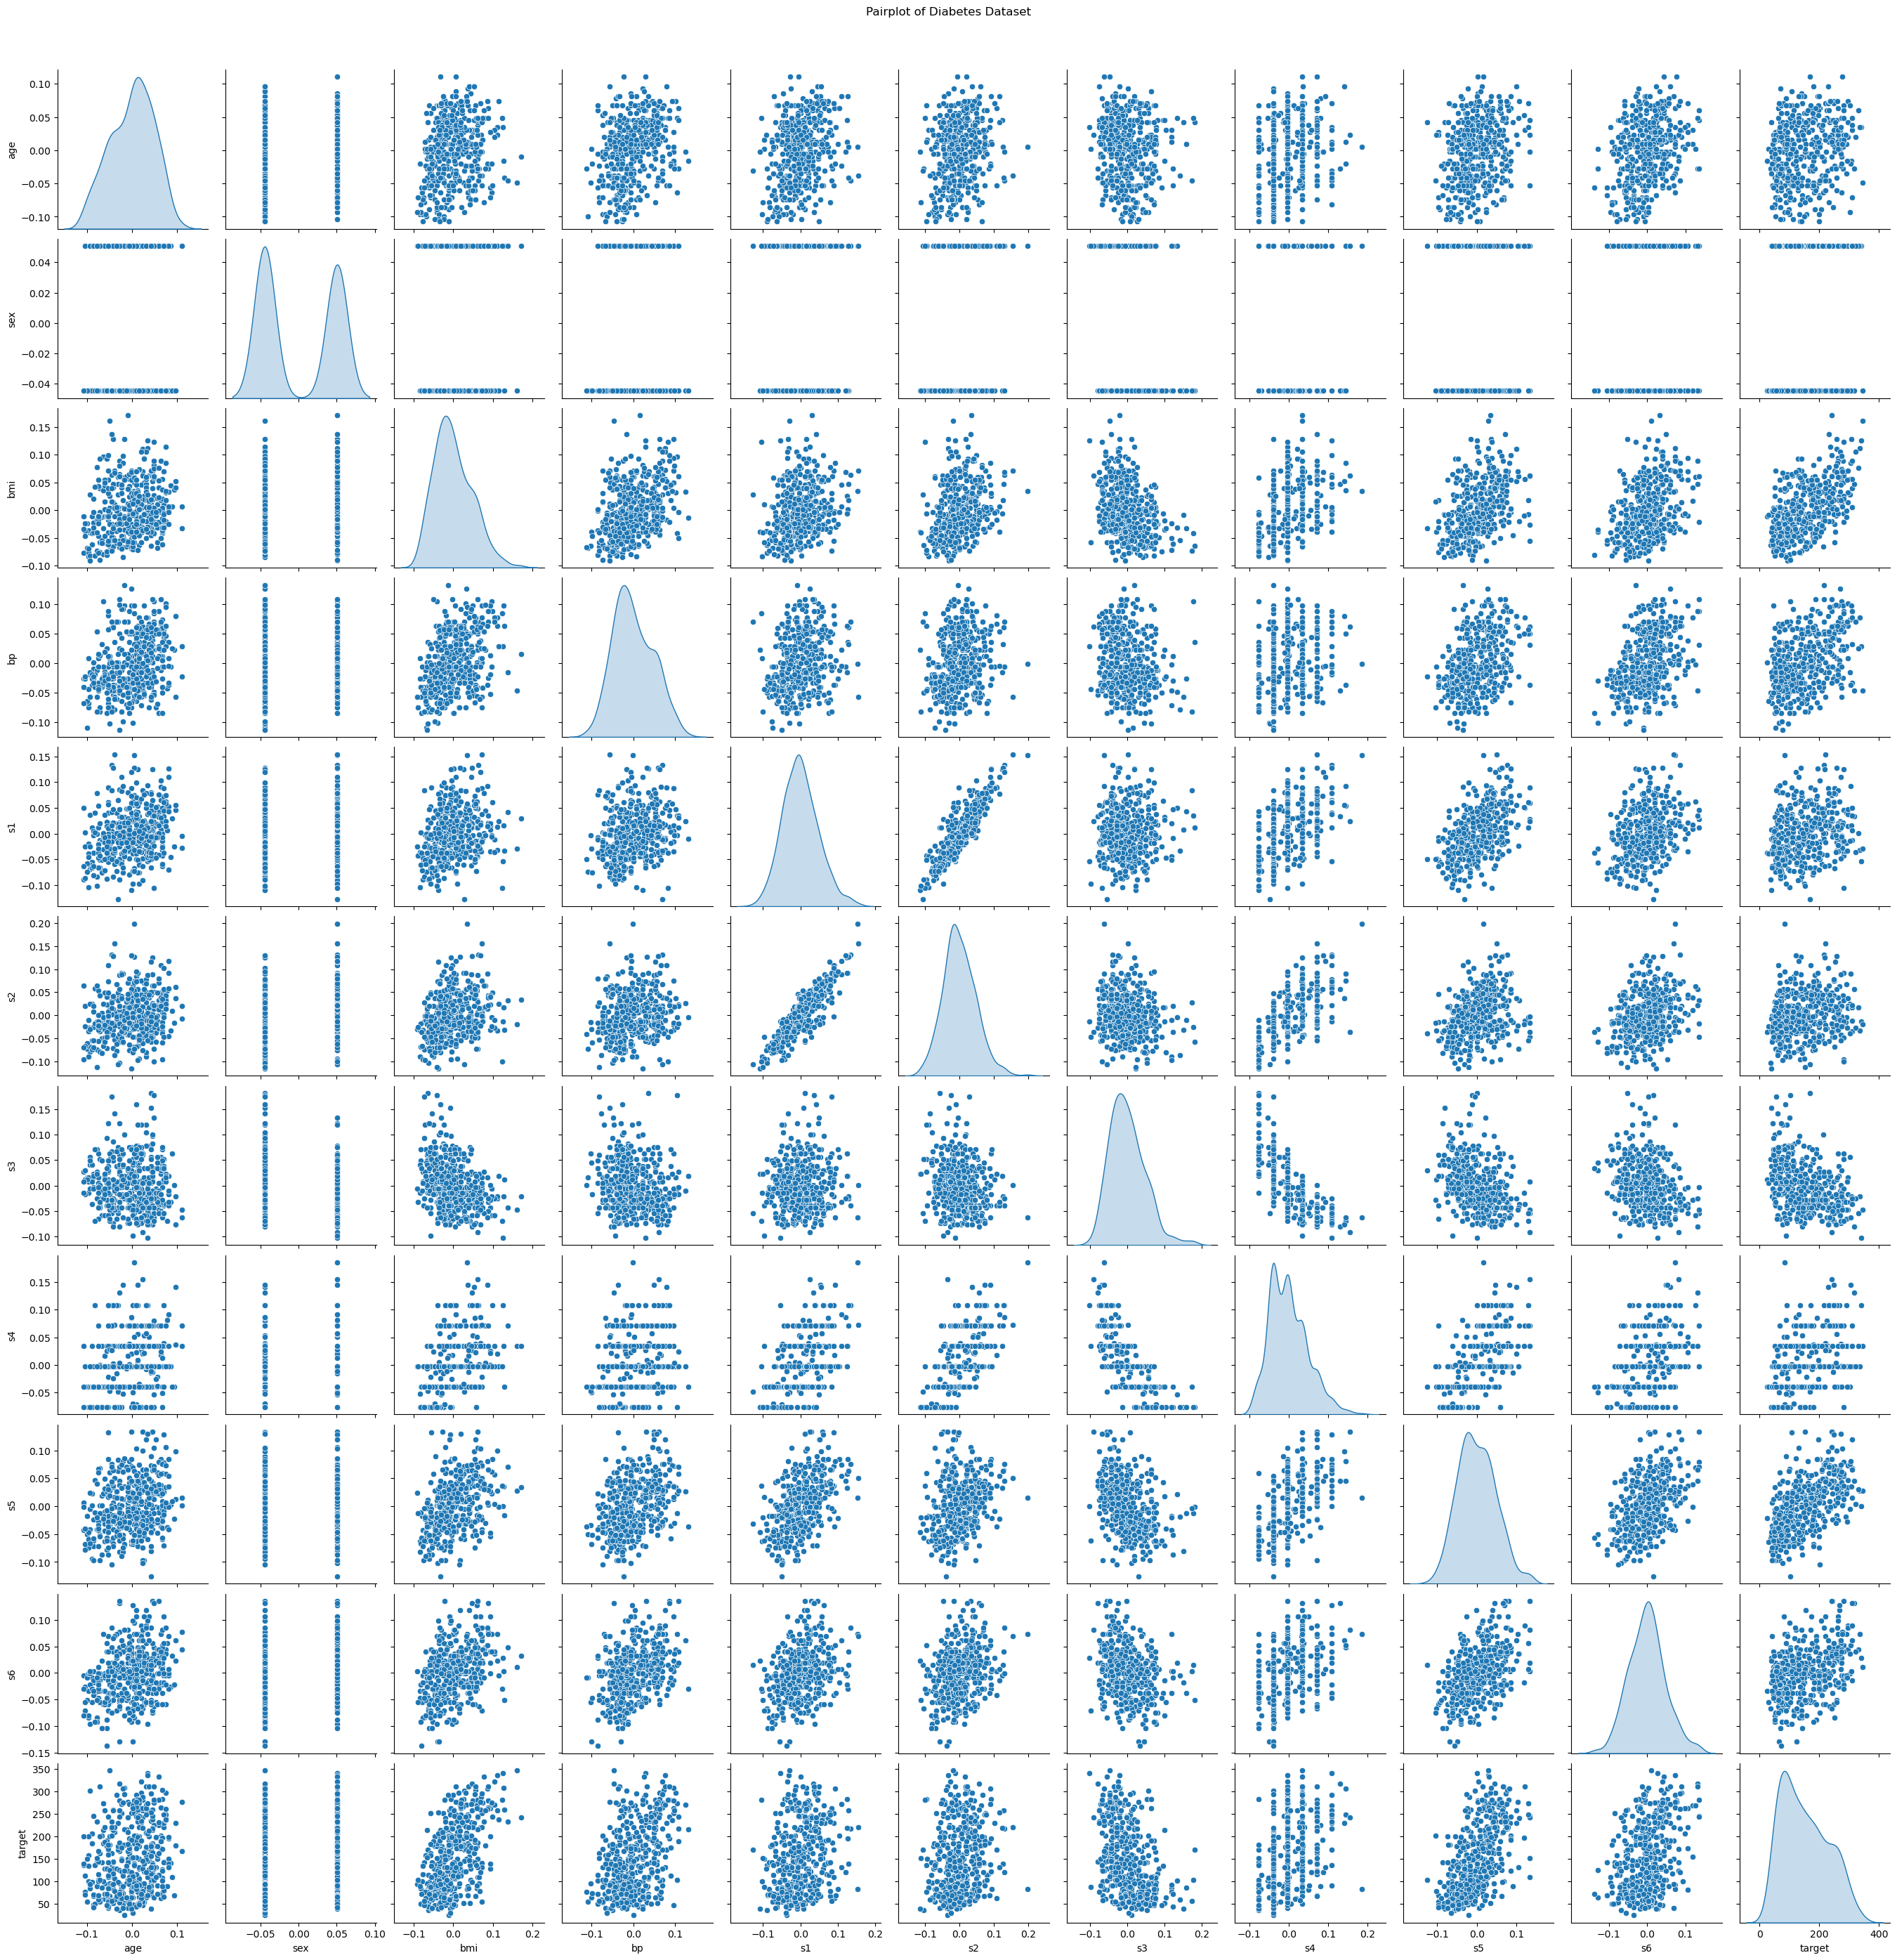

In [7]:
# Pairplot to visualize relationships between features and the target variable
plt.figure(figsize=(12, 10))
sns.pairplot(diabetes_df, diag_kind='kde')
plt.suptitle("Pairplot of Diabetes Dataset", y=1.02)
plt.show()

### Split the data into features and target

In [8]:
# Split the dataset into features (X) and target (y)
X = diabetes_df.drop('target', axis=1)  # Features
y = diabetes_df['target']               # Target (continuous variable)

### Split the data into train and test

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Building

In [10]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

### Evaluate the results

In [11]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 2900.1936284934814
R-squared Score: 0.4526027629719195


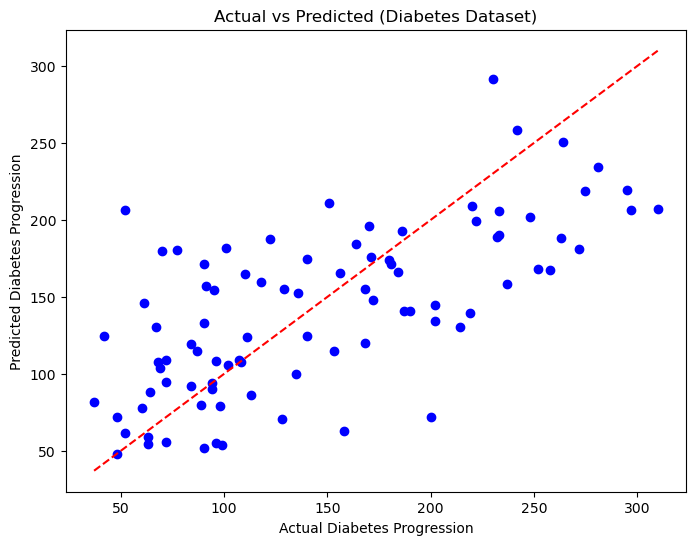

In [12]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Actual vs Predicted (Diabetes Dataset)')
plt.show()

The MSE value of 2900.1936 indicates that the model's predictions have a relatively high level of error or variability compared to the actual values.

The R2 score of 0.4526 suggests that the model's ability to explain the variability in diabetes progression based on the given features is moderate, but there is still substantial unexplained variance.